In [9]:
import sys
import os
sys.path.append("../")
sys.path.append("../..")

from KETIPrePartialDataPreprocessing import makeNaNImputationTest

inputType ='file' # or file
refine_param = {'removeDuplication':True, 'staticFrequency':True}
outlier_param= {'certainOutlierToNaN':True, 'uncertainOutlierToNaN':True, 'data_type':'air'}
"""
imputation_param ={
"imputation_method":[
    {"min":0,"max":1,"method":"mean"},
    {"min":2,"max":4,"method":"linear"},
    {"min":5,"max":10,"method":"brits"}],
"totalNanLimit":0.3}
"""
imputation_param ={
"imputation_method":[
    {"min":0,"max":2,"method":"linear"}],"totalNanLimit":90}

# mean, median X
# ffill~polynomial_interpolate=> 각 구간마다 딱 고만큼만 Fill

input_data = makeNaNImputationTest.inputControl(inputType)
from KETIPrePartialDataPreprocessing import data_preprocessing
import numpy as np
input_test_data = input_data.replace(4.0, np.nan)
output = data_preprocessing.get_preprocessed_data(input_test_data[:25], refine_param, outlier_param, imputation_param)

Preprocessing:Refining
Preprocessing:DataWithMoreNaN
Preprocessing:Imputation
NaN Ratio temp 60.86956521739131
NaN Ratio co2 30.434782608695656
NaN Ratio pm10 34.78260869565217


In [10]:
for key in output:
    print(key, output[key][:20])

original                      temp  co2    pm10
timedate                              
2021-01-28 12:51:00   3.0  5.0 -9999.0
2021-01-28 12:52:00   3.0  5.0    64.0
2021-01-28 12:53:00   NaN  6.0    56.0
2021-01-28 12:54:00   NaN  7.0    59.0
2021-01-28 12:55:00   NaN  7.0    59.0
2021-01-28 12:56:00   3.0  6.0    58.0
2021-01-28 12:57:00   NaN  7.0    57.0
2021-01-28 12:58:00   NaN  7.0    58.0
2021-01-28 12:59:00   NaN  6.0    57.0
2021-01-28 13:00:00   NaN  7.0    56.0
2021-01-28 13:01:00   NaN  6.0    58.0
2021-01-28 13:02:00   NaN  7.0    57.0
2021-01-28 13:03:00   NaN  6.0    56.0
2021-01-28 13:04:00   NaN  6.0    57.0
2021-01-28 13:05:00   3.0  6.0    59.0
2021-01-28 13:06:00   3.0  6.0    61.0
2021-01-28 13:07:00   3.0  6.0    59.0
2021-01-28 13:08:00   3.0  6.0    61.0
2021-01-28 13:09:00   3.0  5.0    60.0
2021-01-28 13:10:00   3.0  6.0    60.0
refined_data                      temp  co2    pm10
timedate                              
2021-01-28 12:51:00   3.0  5.0 -9999.0
202

In [3]:
from KETIPrePartialDataPreprocessing import data_preprocessing

MDP = data_preprocessing.DataPreprocessing()
###########
print("=============")
print('original', input_test_data.isna().sum())
print(input_data[:20])
refined_data = MDP.get_refinedData(input_data, refine_param)
print("=============")
print('after refine', refined_data.isna().sum())
print(refined_data[:20])
###########
datawithMoreCertainNaN, datawithMoreUnCertainNaN = MDP.get_outlierToNaNData(refined_data, outlier_param)
print("=============")
print('after outlierDetection', datawithMoreUnCertainNaN.isna().sum())
print(datawithMoreUnCertainNaN[:20])
###########

### TODO ST Oh
imputed_data = MDP.get_imputedData(datawithMoreUnCertainNaN, imputation_param)
print("=============")
print('after imputation', imputed_data.isna().sum())
print(imputed_data[:20])
    
from KETIPrePartialDataPreprocessing.dataRemovebyNaN import data_remove_byNaN
nanM = data_remove_byNaN.DataRemoveByNaNStatus()
nanMap = nanM.consecutiveNaNCountMap(datawithMoreUnCertainNaN)

original in_ciai              0
in_cici              0
in_cici_co2          0
in_cici_humi         0
in_cici_noise        0
in_cici_pm10         0
in_cici_pm25         0
in_cici_temp         0
in_cici_voc          0
in_co2               0
in_humi              0
in_noise             0
in_pm01           1775
in_pm01_raw       1775
in_pm10           1782
in_pm10_raw       1782
in_pm25          10914
in_pm25_raw      10914
in_temp              0
in_voc             127
dtype: int64
                           in_ciai  in_cici  in_cici_co2  in_cici_humi  \
time                                                                     
2021-02-04 10:33:00+00:00     53.0     57.0          0.0          80.0   
2021-02-04 10:34:00+00:00     67.0     60.0         88.0          54.0   
2021-02-04 10:35:00+00:00     69.0     65.0         87.0          50.0   
2021-02-04 10:36:00+00:00     73.0     66.0         88.0          47.0   
2021-02-04 10:37:00+00:00     76.0     69.0         89.0          47.0   


after refine in_ciai          5686
in_cici          5686
in_cici_co2      5686
in_cici_humi     5686
in_cici_noise    5686
in_cici_pm10     5686
in_cici_pm25     5686
in_cici_temp     5686
in_cici_voc      5686
in_co2           5686
in_humi          5686
in_noise         5686
in_pm01          5686
in_pm01_raw      5686
in_pm10          5686
in_pm10_raw      5686
in_pm25          5686
in_pm25_raw      5686
in_temp          5686
in_voc           5686
dtype: int64
                           in_ciai  in_cici  in_cici_co2  in_cici_humi  \
time                                                                     
2021-02-04 10:33:00+00:00     53.0     57.0          0.0          80.0   
2021-02-04 10:34:00+00:00     67.0     60.0         88.0          54.0   
2021-02-04 10:35:00+00:00     69.0     65.0         87.0          50.0   
2021-02-04 10:36:00+00:00     73.0     66.0         88.0          47.0   
2021-02-04 10:37:00+00:00     76.0     69.0         89.0          47.0   
2021-02-04 10:38

after outlierDetection in_ciai          5686
in_cici          5686
in_cici_co2      5777
in_cici_humi     5777
in_cici_noise    5777
in_cici_pm10     5686
in_cici_pm25     5686
in_cici_temp     5777
in_cici_voc      5850
in_co2           5804
in_humi          5804
in_noise         5804
in_pm01          5686
in_pm01_raw      5686
in_pm10          5686
in_pm10_raw      5686
in_pm25          5686
in_pm25_raw      5686
in_temp          5804
in_voc           5804
dtype: int64
                           in_ciai  in_cici  in_cici_co2  in_cici_humi  \
time                                                                     
2021-02-04 10:33:00+00:00     53.0     57.0          0.0          80.0   
2021-02-04 10:34:00+00:00     67.0     60.0         88.0          54.0   
2021-02-04 10:35:00+00:00     69.0     65.0         87.0          50.0   
2021-02-04 10:36:00+00:00     73.0     66.0         88.0          47.0   
2021-02-04 10:37:00+00:00     76.0     69.0         89.0          47.0   
2021-0

NaN Ratio in_pm10 3.7571528631275686
NaN Ratio in_pm10_raw 3.7571528631275686
NaN Ratio in_pm25 3.7571528631275686
NaN Ratio in_pm25_raw 3.7571528631275686
NaN Ratio in_temp 3.835124027012383
NaN Ratio in_voc 3.835124027012383
after imputation in_ciai          754
in_cici          754
in_cici_co2      757
in_cici_humi     757
in_cici_noise    757
in_cici_pm10     754
in_cici_pm25     754
in_cici_temp     757
in_cici_voc      766
in_co2           762
in_humi          762
in_noise         762
in_pm01          754
in_pm01_raw      754
in_pm10          754
in_pm10_raw      754
in_pm25          754
in_pm25_raw      754
in_temp          762
in_voc           762
dtype: int64
                           in_ciai  in_cici  in_cici_co2  in_cici_humi  \
time                                                                     
2021-02-04 10:33:00+00:00     53.0     57.0          0.0          80.0   
2021-02-04 10:34:00+00:00     67.0     60.0         88.0          54.0   
2021-02-04 10:35:00+00:00  

In [4]:
nanMap.isna().sum()

in_ciai          0
in_cici          0
in_cici_co2      0
in_cici_humi     0
in_cici_noise    0
in_cici_pm10     0
in_cici_pm25     0
in_cici_temp     0
in_cici_voc      0
in_co2           0
in_humi          0
in_noise         0
in_pm01          0
in_pm01_raw      0
in_pm10          0
in_pm10_raw      0
in_pm25          0
in_pm25_raw      0
in_temp          0
in_voc           0
dtype: int64

<AxesSubplot:xlabel='time'>

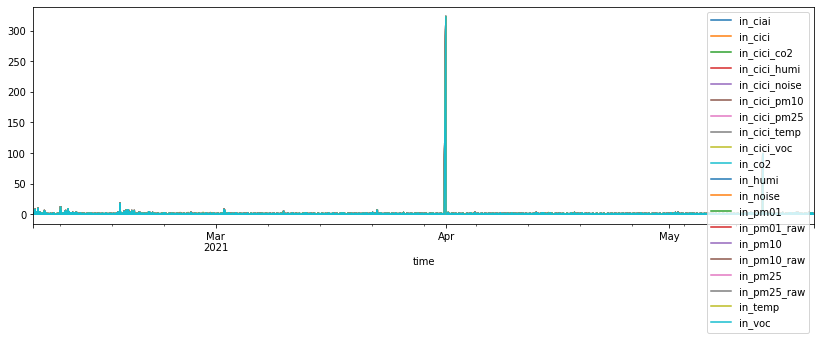

In [5]:
import pandas as pd 
data = datawithMoreUnCertainNaN
consecutiveNanCountMap = pd.DataFrame() 
column_list = data.columns
for column_name in column_list:
    consecutiveNanCountMap[column_name] = data[column_name].isnull().astype(int).groupby(
        data[column_name].notnull().astype(int).cumsum()).cumsum()

consecutiveNanCountMap.plot()

In [6]:
consecutiveNanCountMap

,in_ciai,in_cici,in_cici_co2,in_cici_humi,in_cici_noise,in_cici_pm10,in_cici_pm25,in_cici_temp,in_cici_voc,in_co2,in_humi,in_noise,in_pm01,in_pm01_raw,in_pm10,in_pm10_raw,in_pm25,in_pm25_raw,in_temp,in_voc
time,,,,,,,,,,,,,,,,,,,,
2021-02-04 10:33:00+00:00,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,1
2021-02-04 10:34:00+00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2021-02-04 10:35:00+00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2021-02-04 10:36:00+00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2021-02-04 10:37:00+00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-20 12:46:00+00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2021-05-20 12:47:00+00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2021-05-20 12:48:00+00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
